In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
import numpy as np

# Database
https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

# Veamos los datos


In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Leer los datos 
# En local: tenemos que tener el fichero en la misma carpeta que el notebook (o cambiar la ruta)
# En Colab: abre la carpeta (usando el boton de la izquierda) y arrastralos dentro desde tu ordenador.
dataset = pd.read_csv("/content/drive/MyDrive/TEMP/2023_BME_MIA9_CNN/scripts_CNN/googl.us.txt", delimiter=",")

In [7]:
# Tenemos 5 datos por dia
dataset

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0
...,...,...,...,...,...,...,...
3328,2017-11-06,1049.100,1052.59,1042.000,1042.680,913954,0
3329,2017-11-07,1049.650,1053.41,1043.000,1052.390,1303832,0
3330,2017-11-08,1050.050,1062.69,1047.050,1058.290,1214469,0
3331,2017-11-09,1048.000,1050.88,1035.850,1047.720,1793994,0


In [8]:
# Estos son los datos de apertura
dataset['Open']

0         50.000
1         50.505
2         55.375
3         55.620
4         52.480
          ...   
3328    1049.100
3329    1049.650
3330    1050.050
3331    1048.000
3332    1043.870
Name: Open, Length: 3333, dtype: float64

In [9]:
# Nos guardamos la serie de apertura en la variable 'aa'
aa = dataset['Open']
aa.shape

(3333,)

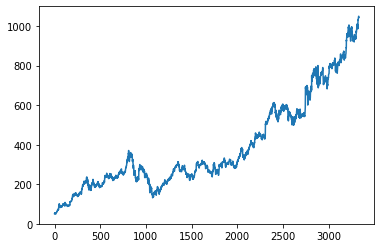

In [10]:
# Ploteamos los datos de apertura
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(aa)

<Figure size 432x288 with 0 Axes>

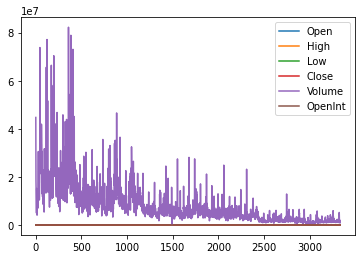

In [11]:
# Ploteamos todos los datos (solo se ven los de volumen porque los valores son muy grandes)
%matplotlib inline
plt.figure()
dataset.plot()

In [12]:
# Nos guardamos los datos de apertura y cierra
googl_op = dataset['Open']
googl_cl = dataset['Close']

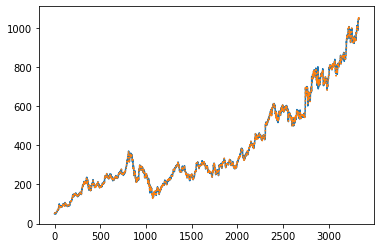

In [13]:
# Ploteamos los datos de apertura y cierra
%matplotlib inline
plt.figure()
plt.plot(googl_op)
plt.plot(googl_cl,':')

In [14]:
# Reordenamos los datos para usarlos después
# Generamos datos de entrada de 10 dias de apertura
# El dato de salida (a predecir) es el de cierre del úúltimo dia
# Partimos en entrenamiento y test
import numpy as np
xx = googl_op.values[np.arange(0,2000,1)]
yy = googl_cl.values[np.arange(0,2000,1)]
                     
X_train = np.reshape(xx,(200,10,1))
y_train = yy[np.arange(9,2000,10)]
                     
xx = googl_op.values[np.arange(2000,3000,1)]
yy = googl_cl.values[np.arange(2000,3000,1)]
X_test = np.reshape(xx,(100,10,1))
y_test = yy[np.arange(9,1000,10)]

In [15]:
# Dimensiones -> (Número de datos, Número de dimensiones, Número de canales)
X_train.shape

(200, 10, 1)

In [23]:
X_train_fake = X_train+np.random.randn(*X_train.shape)

In [24]:
y_train_fake = y_train

In [27]:
X_train = np.concatenate((X_train,X_train_fake),0)

In [28]:
y_train = np.concatenate((y_train,y_train_fake),0)

In [34]:
X_train.shape

(400, 10, 1)

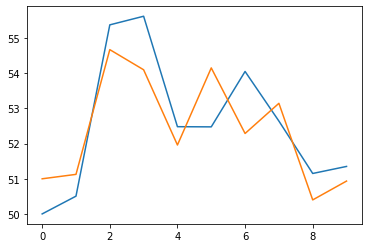

In [40]:
plt.plot(X_train[0,:,0])
plt.plot(X_train_fake[0,:,0])

In [32]:
X_train[0:400:10,:,0]

array([[ 50.        ,  50.505     ,  55.375     ,  55.62      ,
         52.48      ,  52.475     ,  54.05      ,  52.64      ,
         51.15      ,  51.35      ],
       [ 97.81      ,  97.165     ,  97.69      ,  98.        ,
        100.48      , 102.32      ,  96.25      ,  97.27      ,
         94.345     ,  90.97      ],
       [141.2       , 148.55      , 146.43      , 142.36      ,
        143.5       , 139.91      , 139.29      , 137.5       ,
        137.13      , 139.5       ],
       [173.14      , 178.3       , 177.64      , 180.12      ,
        185.93      , 190.85      , 191.2       , 194.99      ,
        197.55      , 197.12      ],
       [169.88      , 171.18      , 184.31      , 183.54      ,
        185.86      , 189.97      , 194.6       , 194.37      ,
        194.76      , 194.95      ],
       [185.75      , 187.06      , 191.74      , 193.2       ,
        193.16      , 189.05      , 188.86      , 188.82      ,
        187.22      , 186.54      ],
       [24

# MODELO

In [37]:
# Creamos un modelo sencillo de convolucióón 1D
model = Sequential()
capa_1 = Conv1D(10, kernel_size = (3,), input_shape=(10,1))
model.add(capa_1)
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')


In [38]:
# Vemos como es el modelo (capas, parámetros...)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 10)             40        
                                                                 
 flatten (Flatten)           (None, 80)                0         
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Entrenamos el modelo
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
13/13 [==============================] - 7s 5ms/step - loss: 286.1371
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 151.8337
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 31.8301
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 18.0338
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 9.3563
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 6.0859
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 5.4587
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 5.3222
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 5.5315
Epoch 10/10
13/13 [==============================] - 0s 2ms/step - loss: 5.3915


In [ ]:
# Predecimos sobre los datos de test
y_hat = model.predict(X_test)

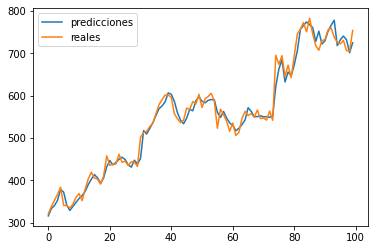

In [ ]:
# Ploteamos las predicciones y los valores reales
# (En la vida real no tendriamos y_test para poder visualizarlos)
%matplotlib inline
plt.figure()
plt.plot(y_hat,label='predicciones')
plt.plot(y_test,label='reales')
plt.legend()

In [ ]:
# Evaluamos sobre los datos de test
# (En la vida real no tendriamos y_test para poder evaluar)
score = model.evaluate(X_test, y_test, batch_size=128)

score

1/1 [==============================] - 0s 98ms/step - loss: 12.4421


12.44210433959961